In [3]:
import Pkg
Pkg.add(["Plots","LsqFit","OrdinaryDiffEq", "ModelingToolkit", "StochasticDiffEq"])

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [4]:
using Plots, LsqFit, OrdinaryDiffEq, ModelingToolkit, StochasticDiffEq

In [5]:
@variables t x(t)
@parameters τ
@constants h = 1
D = Differential(t)

(::Differential) (generic function with 2 methods)

In [7]:
eqs = [ D(x) ~ (h-x)/τ ]
@named fol = ODESystem(eqs, t)

Model fol with 1 equations
States (1):
  x(t)
Parameters (1):
  τ

In [9]:
prob = ODEProblem(fol, [x => 0.0], (0.0, 10.0), [τ => 3.0])

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: 1-element Vector{Float64}:
 0.0

In [11]:
sol = solve(prob, Tsit5())

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 14-element Vector{Float64}:
  0.0
  9.999999999999999e-5
  0.0010999999999999998
  0.011099999999999997
  0.11109999999999996
  0.44196924781807967
  1.0112520758966859
  1.7621013896357889
  2.7411196006326954
  3.954782507222947
  5.435343082434807
  7.201735027334962
  9.291406745592692
 10.0
u: 14-element Vector{Vector{Float64}}:
 [0.0]
 [3.333277778395056e-5]
 [0.00036659945265974064]
 [0.0036931634343634343]
 [0.03635598665335361]
 [0.13698489268755673]
 [0.28615114066001385]
 [0.44421130189743585]
 [0.5989648996141729]
 [0.7323994349297618]
 [0.836636389514038]
 [0.9093330812230747]
 [0.9548191028045533]
 [0.9643240555350271]

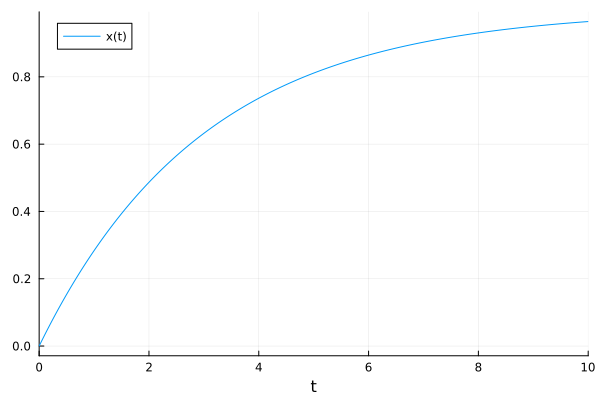

In [12]:
plot(sol)

In [13]:
# Lets move to something more difficult
@parameters θ=1.0
@variables x(t) y(t)

eqsvdp = [D(x) ~ y,
          D(y) ~ θ*(1-x^2)*y - x]

@named vdp = ODESystem(eqsvdp, t)

Model vdp with 2 equations
States (2):
  x(t)
  y(t)
Parameters (1):
  θ [defaults to 1.0]

In [14]:
prob_vdp = ODEProblem(vdp, [x => 0.0, y=> 1.0], (0.0, 10.0), [ θ => 1.0])
sol_vdp = solve(prob_vdp, Tsit5())

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 32-element Vector{Float64}:
  0.0
  0.0009990005004983772
  0.010989005505482149
  0.06763893175766014
  0.18883013177103117
  0.3627552189087665
  0.5876702203617703
  0.839204138633173
  1.1226958820569308
  1.421801948484895
  1.7634933907796146
  2.1023562968151506
  2.581537365273061
  ⋮
  5.615677896872127
  6.121687153288896
  6.638075876479909
  7.021477750257666
  7.403485083604598
  7.779689466859235
  8.093964355158034
  8.420159580860531
  8.880034654311258
  9.407278502636826
  9.962892991424923
 10.0
u: 32-element Vector{Vector{Float64}}:
 [0.0, 1.0]
 [0.0009994995013737494, 1.0009990000013733]
 [0.011049382783529096, 1.0109883328288922]
 [0.06992364544465042, 1.0674706357603392]
 [0.20646707847264908, 1.1845896979621482]
 [0.4254867963640602, 1.326269275664189]
 [0.7351425786440712, 1.398963060422901]
 [1.0719324276742228, 1.2294663161023924]
 [1.3567113672796458, 0.7448413879875236]
 [1.492081

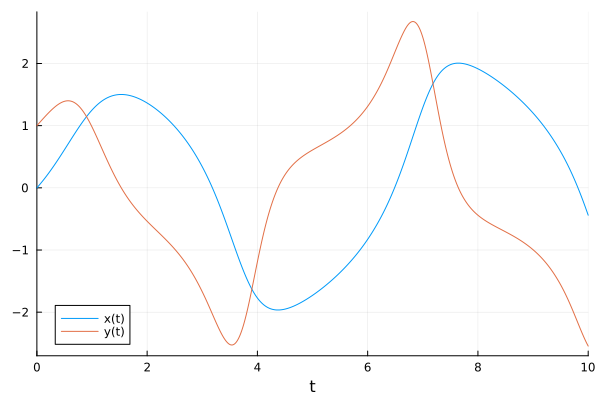

In [15]:
plot(sol_vdp)

In [20]:
prob_new = remake(prob_vdp, u0=[1.0,0.0],tspan=(0,100))

ODEProblem with uType Vector{Float64} and tType Int64. In-place: true
timespan: (0, 100)
u0: 2-element Vector{Float64}:
 1.0
 0.0

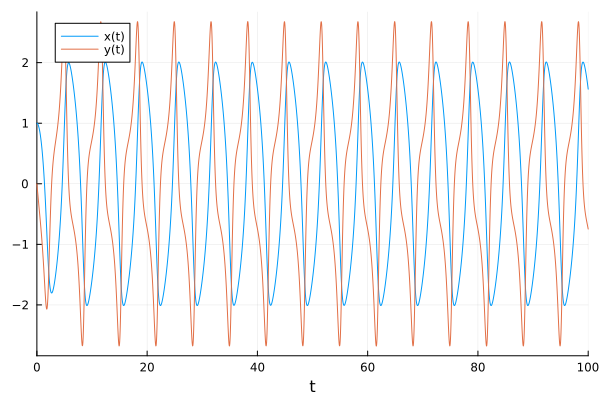

In [21]:
sol_vdp = solve(prob_new, Tsit5())
plot(sol_vdp)

In [22]:
@parameters ϕ=0.1

1-element Vector{Num}:
 ϕ

In [23]:
noiseeqs = [ϕ,ϕ]
@named stoch_vdp = SDESystem(eqsvdp,noiseeqs,t,[x,y],[θ, ϕ])

Model stoch_vdp with 2 equations
States (2):
  x(t)
  y(t)
Parameters (2):
  θ [defaults to 1.0]
  ϕ [defaults to 0.1]

In [24]:
prob_svdp = SDEProblem(stoch_vdp, [x => 0.0, y=> 1.0], (0.0, 100.0), [ θ => 1.0, ϕ => 0.1])

SDEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 100.0)
u0: 2-element Vector{Float64}:
 0.0
 1.0

In [27]:
sol_svp = solve(prob_svdp, SOSRI())

retcode: Success
Interpolation: 1st order linear
t: 54882-element Vector{Float64}:
   0.0
   0.0008516089033669708
   0.0010219306840403648
   0.0012135426872979332
   0.0014291061909626976
   0.0016716151325855575
   0.001944437691911275
   0.002251363071152707
   0.0025966541227993183
   0.002985106555901756
   0.0034221155431419987
   0.003913750653787271
   0.004466840153263204
   ⋮
  99.96457750742164
  99.96802100923875
  99.97146037739115
  99.97488814024727
  99.97830546588489
  99.98169967069997
  99.98507964078982
  99.98845245670545
  99.99181290139755
  99.9951432035595
  99.99845754268482
 100.0
u: 54882-element Vector{Vector{Float64}}:
 [0.0, 1.0]
 [-0.00017561697864729183, 1.0000323358633456]
 [-0.00018425502755801157, 0.9992514175518226]
 [-0.0013944657856993872, 0.9983883508869758]
 [-0.0013378537839476715, 0.9999642757795332]
 [-0.001534396245722348, 1.0013009132098343]
 [-0.002951413742594271, 0.998995262923681]
 [-0.00509000375443098, 0.9959704956347054]
 [-0.004798

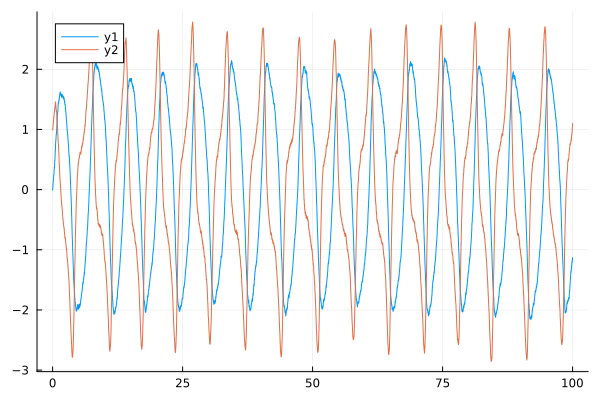

In [28]:
plot(sol_svp.t, sol_svp[1,:])
plot!(sol_svp.t, sol_svp[2,:])

In [31]:
prob_new_svdp = remake(prob_svdp, p = [1.0,0.5])
sol_new_svdp = solve(prob_new_svdp, SOSRI())

retcode: Success
Interpolation: 1st order linear
t: 53999-element Vector{Float64}:
   0.0
   0.00027463561918761575
   0.00034112138936031824
   0.0004159178808046086
   0.0005000639336794352
   0.0005947282431636152
   0.0007012255913333177
   0.0008210351080242329
   0.0009558208143015125
   0.0011074547338634521
   0.0012780428933706343
   0.001469954572816214
   0.0016858552121924914
   ⋮
  99.97481133457092
  99.9771214586095
  99.97943568585073
  99.98173252135892
  99.98402365645289
  99.98630886746105
  99.98861549429091
  99.99092665918324
  99.99321344074183
  99.99550401895027
  99.99779726865758
 100.0
u: 53999-element Vector{Vector{Float64}}:
 [0.0, 1.0]
 [-0.007645218147579482, 1.0079977742584634]
 [-0.0039388110946759185, 1.0034396029676502]
 [0.0017662361602163229, 1.0005296225307392]
 [-0.0020382760735801076, 1.0014215667707487]
 [-0.00426398714969579, 1.0036704698438257]
 [-0.013756568604046018, 1.0068361386450797]
 [-0.01925589738791487, 1.0067328872648955]
 [-0.0144

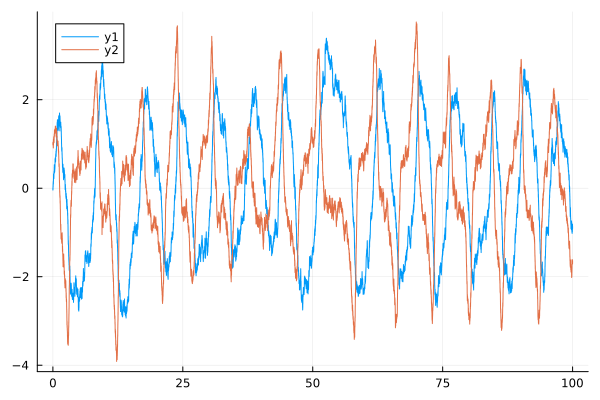

In [32]:
plot(sol_new_svdp.t, sol_new_svdp[1,:])
plot!(sol_new_svdp.t, sol_new_svdp[2,:])